In [1]:
import matplotlib
matplotlib.use('Agg')

import sys
sys.settrace
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pylab import *
import struct
import array
import os
from scipy.interpolate import griddata

import h5py

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']
plt.rcParams['font.size'] = '20'

/var/folders/2n/ftypqy6s65s2j7krblnn49cw0000gq/T/ipykernel_83624/3957739208.py:22: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']


In [2]:
import athena_read

In [3]:
vol_func = lambda rm,rp,thetam,thetap,phim,phip: \
            1.0/3.0*(rp**3-rm**3) * abs(np.cos(thetam)-np.cos(thetap)) * (phip-phim)
rarea_func = lambda r,thetam,thetap, phim, phip: \
           r**2.0 * abs(np.cos(thetam)-np.cos(thetap)) * (phip-phim)
tarea_func = lambda rm, rp, theta, phim, phip: \
          0.5*(rp**2.0 - rm**2.0)*np.sin(theta)*(phip - phim)
parea_func = lambda rm, rp, thetam, thetap: \
          0.5*(rp**2.0 - rm**2.0)*abs(thetap - thetam)

In [4]:
def PlotProfile2(data,sol,filename,ylabel1,ylabel2,xlabel=None,label1=None,label2=None):
    plots, axes = plt.subplots(2,1,figsize=(9,11),dpi=300,sharex=True)
    plt.subplots_adjust(left=0.14,right=0.95,top=0.95,bottom=0.1,hspace=0.02)
    if xlabel is None:
        plt.xlabel('$ r $', size = 30)
    else:
        plt.xlabel(xlabel, size = 30)
    plt.xlim([-0.03,3.2])
    

    axes[0].plot(data[0],data[1],color='black',label=label1,alpha=0.5,linewidth=2.0,marker='o',fillstyle='none',markersize=10)
    axes[0].plot(data[0],data[2],color='blue',label=label2,alpha=0.5,linewidth=4.0,marker='o',fillstyle='none',markersize=10)
    axes[0].plot(sol[0],sol[1],color='black',linestyle='dashed')
#    axes[0].set_xscale('log')
    axes[0].set_ylabel(ylabel1, size=30)
    axes[0].set_ylim(-0.05,1.03)  
#    axes[0].set_yscale('log')  
    axes[0].yaxis.set_tick_params(labelsize=25)

    if label1 is not None:
        axes[0].legend(loc=[0.6,0.1],frameon=False,fontsize = 22)

#    axes[0].text(1.e-2, 2.3, '$a_rT_0^4/P_0=0.01$', dict(size=25,color='black'))
#    axes[0].text(1.e-2, 2.1, '$a_rT_0^4/P_0=1$', dict(size=25,color='blue'))
#    axes[0].text(1.e-2, 1.9, '$a_rT_0^4/P_0=10$', dict(size=25,color='red'))    

    axes[1].plot(data[0],data[1],color='black',label=label1,alpha=0.5,linewidth=2.0,marker='o',
                 fillstyle='none',markersize=10)
    axes[1].plot(data[0],data[3],color='blue',label='$v=-0.05c$',alpha=0.5,linewidth=4.0,marker='o',
                 fillstyle='none',markersize=10)
    axes[1].plot(sol[0],sol[2],color='black',linestyle='dashed')
    
#    axes[1].set_yscale('log')
#    axes[1].set_xscale('log')
    axes[1].set_ylabel(ylabel2, size=30)
    axes[1].set_ylim(-0.05,1.03)  
    axes[1].yaxis.set_tick_params(labelsize=25)
    axes[1].xaxis.set_tick_params(labelsize=25)
    axes[1].legend(loc=[0.6,0.1],frameon=False,fontsize = 22)


    plt.savefig(filename)
    plt.clf()


In [5]:
def PlotProfile4(data,sol,filename,ylabel1,ylabel2,xlabel=None,label1=None,label2=None,label3=None):
    plots, axes = plt.subplots(2,1,figsize=(9,11),dpi=300,sharex=True)
    plt.subplots_adjust(left=0.14,right=0.95,top=0.95,bottom=0.1,hspace=0.02)
    if xlabel is None:
        plt.xlabel('$ r $', size = 30)
    else:
        plt.xlabel(xlabel, size = 30)
    plt.xlim([-0.03,3.2])
    
    binleft=data[0][:-1]
    binright=data[0][1:]
    binheight=data[1][:-1]
    hist_x = np.array([binleft, binright]).T.flatten()
    hist_y = np.array([binheight, binheight]).T.flatten()    
    
    binheight2=data[2][:-1]
    hist_y2=np.array([binheight2, binheight2]).T.flatten()  
    
    solbinleft=sol[0][:-1]
    solbinright=sol[0][1:]
    
    solheight=sol[1][:-1]
    sol_x = np.array([solbinleft,solbinright]).T.flatten()
    sol_y = np.array([solheight,solheight]).T.flatten()

    axes[0].plot(hist_x,hist_y,color='black',label=label1,alpha=0.5,linewidth=2.0)
    axes[0].plot(hist_x,hist_y2,color='blue',label=label2,alpha=0.5,linewidth=4.0)
#    axes[0].plot(sol_x,sol_y,color='red',linestyle='dashed',alpha=0.7)
#    axes[0].set_xscale('log')
    axes[0].set_ylabel(ylabel1, size=30)
    axes[0].set_ylim(-0.05,1.03)  
#    axes[0].set_yscale('log')  
    axes[0].yaxis.set_tick_params(labelsize=25)

    if label1 is not None:
        axes[0].legend(loc=[0.6,0.1],frameon=False,fontsize = 22)

#    axes[0].text(1.e-2, 2.3, '$a_rT_0^4/P_0=0.01$', dict(size=25,color='black'))
#    axes[0].text(1.e-2, 2.1, '$a_rT_0^4/P_0=1$', dict(size=25,color='blue'))
#    axes[0].text(1.e-2, 1.9, '$a_rT_0^4/P_0=10$', dict(size=25,color='red'))    

    binheight3=data[3][:-1]
    hist_y3=np.array([binheight3, binheight3]).T.flatten()  
    
    solheight2=sol[2][:-1]
    sol_y2 = np.array([solheight2,solheight2]).T.flatten()

    axes[1].plot(hist_x,hist_y,color='black',label=label1,alpha=0.5,linewidth=2.0)
    axes[1].plot(hist_x,hist_y3,color='blue',label=label3,alpha=0.5,linewidth=4.0)
#    axes[1].plot(sol_x,sol_y2,color='red',linestyle='dashed',alpha=0.7)
    
#    axes[1].set_yscale('log')
#    axes[1].set_xscale('log')
    axes[1].set_ylabel(ylabel2, size=30)
    axes[1].set_ylim(-0.05,1.03)  
    axes[1].yaxis.set_tick_params(labelsize=25)
    axes[1].xaxis.set_tick_params(labelsize=25)
    axes[1].legend(loc=[0.6,0.1],frameon=False,fontsize = 22)


    plt.savefig(filename)
    plt.clf()


In [6]:
def PlotProfile3(data,data1,filename,ylabel1,ylabel2,xlabel=None):
    plots, axes = plt.subplots(2,1,figsize=(9,11),dpi=300,sharex=False)
    plt.subplots_adjust(left=0.12,right=0.95,top=0.95,bottom=0.1,hspace=0.2)
    if xlabel is None:
        plt.xlabel('$ r $', size = 30)
    else:
        plt.xlabel(xlabel, size = 30)
    plt.xlim([-0.03,3.2])
    

    axes[0].plot(data[0],data[1],color='black',linewidth=4.0)
#    axes[0].set_xscale('log')
    axes[0].set_ylabel(ylabel1, size=30)
    axes[0].set_ylim(-5.,100)  
#    axes[0].set_yscale('log')  
    axes[0].yaxis.set_tick_params(labelsize=25)

    axes[0].set_xlabel('$x$',size=30)
    axes[0].xaxis.set_tick_params(labelsize=25)
    axes[0].set_xlim(0,1)

#    axes[0].text(1.e-2, 2.3, '$a_rT_0^4/P_0=0.01$', dict(size=25,color='black'))
#    axes[0].text(1.e-2, 2.1, '$a_rT_0^4/P_0=1$', dict(size=25,color='blue'))
#    axes[0].text(1.e-2, 1.9, '$a_rT_0^4/P_0=10$', dict(size=25,color='red'))  
    binleft=data1[0][:-1]
    binright=data1[0][1:]
    binheight=data1[1][:-1]
    hist_x = np.array([binleft, binright]).T.flatten()
    hist_y = np.array([binheight, binheight]).T.flatten()

    axes[1].plot(hist_x,hist_y,color='black',linewidth=4)
    
#    axes[1].set_yscale('log')
#    axes[1].set_xscale('log')
    axes[1].set_ylabel(ylabel2, size=30)
    axes[1].set_ylim(-5.,100)  
    axes[1].yaxis.set_tick_params(labelsize=25)
    axes[1].xaxis.set_tick_params(labelsize=25)
    axes[1].set_xlabel('$\\tilde{\\nu}$',size=30)
    axes[1].set_xlim(-0.03,3.2)


    plt.savefig(filename)
    plt.clf()

In [7]:
def PlotProfile(datax, datay, xmin, xmax, ymin, ymax,  ylabel, label1, filename, xlabel='$r/r_g$', logscale=0, 
                xlogscale=0, datax1_2=None, datay1_2=None, datay1_3=None, datax2=None, datay2=None, datax2_2=None, 
                datay2_2=None, datay2_3=None, datax3=None, datay3=None, datax3_2=None, datay3_2=None, datay3_3=None, 
                datax4=None, datay4=None, datax4_2=None, datay4_2=None, datax5=None, datay5=None, label2='', 
                label3='', label4='', label5='',title=None,leg_loc=None):
    plots, axes = plt.subplots(figsize=(9,11),dpi=300)
    plt.xlabel(xlabel, size = 30)
    plt.ylabel(ylabel, size = 30)
    plt.subplots_adjust(left=0.15,right=0.88,top=0.9,bottom=0.1)
    plt.ylim([ymin,ymax])
    plt.xlim([xmin,xmax])
    axes.yaxis.set_tick_params(labelsize=25)
    axes.xaxis.set_tick_params(labelsize=25)
    if logscale > 0:
        axes.set_yscale('log')
    if xlogscale > 0:
        axes.set_xscale('log')
    if title is not None:
        plt.title(title,size=20)

    plt.plot(datax,datay,color='black',label=label1,alpha=0.7,linewidth=3.0,marker='o',fillstyle='none',markersize=10)
    if datay1_2 is not None:
        if datax1_2 is not None:
            plt.plot(datax1_2,datay1_2,color='black',linestyle='dashed')
        else:
            plt.plot(datax1,datay1_2,color='black',linestyle='dashed')   
    if datay1_3 is not None:
        plt.plot(datax,datay1_3,color='black',linestyle='dashed',linewidth=4.0)
    if datay2 is not None:
        plt.plot(datax2,datay2,color='red',alpha=0.7,label=label2,linewidth=3.0,marker='o',
                 fillstyle='none',markersize=10)
    if datay2_2 is not None:
        if datax2_2 is not None:
            plt.plot(datax2_2,datay2_2,color='red',linestyle='dashed')
        else:
            plt.plot(datax2,datay2_2,color='red',linestyle='dashed')      
    if datay2_3 is not None:
        plt.plot(datax2,datay2_3,color='red',linestyle='dashed',linewidth=4.0)
    if datay3 is not None:
        plt.plot(datax3,datay3,color='green',alpha=0.7,label=label3,linewidth=3.0,
                 marker='o',fillstyle='none',markersize=10)
    if datay3_2 is not None:
        if datax3_2 is not None:
            plt.scatter(datax3_2,datay3_2,s=80,facecolors='none', edgecolors='green')
        else:
            plt.scatter(datax3_2,datay3_2,s=80,facecolors='none', edgecolors='green')          
    if datay3_3 is not None:
        plt.plot(datax3,datay3_3,color='green',linestyle='dashed',linewidth=4.0)
    if datay4 is not None:
        plt.plot(datax4,datay4,color='blue',label=label4,linewidth=3.0)
        if datax4_2 is not None:
            plt.scatter(datax4_2,datay4_2,s=80,facecolors='none', edgecolors='blue')
        else:
            plt.scatter(datax4,datay4_2,s=80,facecolors='none', edgecolors='blue')
    if datay5 is not None:
        plt.plot(datax5,datay5,color=tableau20[0],label=label5,linewidth=2.0) 
    if leg_loc is not None:
        plt.legend(loc="best",bbox_to_anchor=leg_loc,frameon=False,fontsize=22)
    axes.set_aspect('auto')
#    axes.yaxis.set_tick_params(labelsize=25)
#    axes.xaxis.set_tick_params(labelsize=25)
    plt.savefig(filename)
    plt.close(plots)


In [8]:
gamma=5.0/3.0
file1='Data/moving.out4.00100.athdf'

with h5py.File(file1, 'r') as f:
    attributes = f.attrs.items()
    attrs = dict(attributes)
    level = f.attrs['MaxLevel']
    time1 = f.attrs['Time']
    subsample = False

    data1 = athena_read.athdf(file1,level=level, subsample=subsample)

file='Data_nu_vplus/moving.out4.00100.athdf'

with h5py.File(file, 'r') as f:
    attributes = f.attrs.items()
    attrs = dict(attributes)
    level = f.attrs['MaxLevel']
    time = f.attrs['Time']
    subsample = False

    data_nur = athena_read.athdf(file,level=level, subsample=subsample)
    
file='Data_v5/moving.out4.00100.athdf'

with h5py.File(file, 'r') as f:
    attributes = f.attrs.items()
    attrs = dict(attributes)
    level = f.attrs['MaxLevel']
    time = f.attrs['Time']
    subsample = False

    data_v5 = athena_read.athdf(file,level=level, subsample=subsample)
    
file='Data_nu_vsubtract/moving.out4.00100.athdf'

with h5py.File(file, 'r') as f:
    attributes = f.attrs.items()
    attrs = dict(attributes)
    level = f.attrs['MaxLevel']
    time = f.attrs['Time']
    subsample = False

    data_nul = athena_read.athdf(file,level=level, subsample=subsample)
    
file='Data_v-5/moving.out4.00100.athdf'

with h5py.File(file, 'r') as f:
    attributes = f.attrs.items()
    attrs = dict(attributes)
    level = f.attrs['MaxLevel']
    time = f.attrs['Time']
    subsample = False

    data_v_5 = athena_read.athdf(file,level=level, subsample=subsample)

In [9]:
nx1 = attrs['RootGridSize'][0] * 2**level
nx2 = attrs['RootGridSize'][1] * 2**level
nx3 = attrs['RootGridSize'][2] * 2**level
x1f = data1['x1f']
x2f = data1['x2f']
x3f = data1['x3f']
x1v = data1['x1v'] 
x2v = data1['x2v']
x3v = data1['x3v']
vol = np.zeros((nx3,nx2,nx1))


In [10]:
print(data1['VariableNames'])

[b'rho' b'press' b'vel1' b'vel2' b'vel3' b'Er_0' b'Fr_0_1' b'Fr_0_2'
 b'Fr_0_3' b'Pr_0_11' b'Pr_0_22' b'Pr_0_33' b'Pr_0_12' b'Pr_0_13'
 b'Pr_0_23' b'Pr_0_21' b'Pr_0_31' b'Pr_0_32' b'Er0_0' b'Fr0_0_1'
 b'Fr0_0_2' b'Fr0_0_3' b'Er_1' b'Fr_1_1' b'Fr_1_2' b'Fr_1_3' b'Pr_1_11'
 b'Pr_1_22' b'Pr_1_33' b'Pr_1_12' b'Pr_1_13' b'Pr_1_23' b'Pr_1_21'
 b'Pr_1_31' b'Pr_1_32' b'Er0_1' b'Fr0_1_1' b'Fr0_1_2' b'Fr0_1_3' b'Er_2'
 b'Fr_2_1' b'Fr_2_2' b'Fr_2_3' b'Pr_2_11' b'Pr_2_22' b'Pr_2_33' b'Pr_2_12'
 b'Pr_2_13' b'Pr_2_23' b'Pr_2_21' b'Pr_2_31' b'Pr_2_32' b'Er0_2'
 b'Fr0_2_1' b'Fr0_2_2' b'Fr0_2_3' b'Er_3' b'Fr_3_1' b'Fr_3_2' b'Fr_3_3'
 b'Pr_3_11' b'Pr_3_22' b'Pr_3_33' b'Pr_3_12' b'Pr_3_13' b'Pr_3_23'
 b'Pr_3_21' b'Pr_3_31' b'Pr_3_32' b'Er0_3' b'Fr0_3_1' b'Fr0_3_2'
 b'Fr0_3_3' b'Er_4' b'Fr_4_1' b'Fr_4_2' b'Fr_4_3' b'Pr_4_11' b'Pr_4_22'
 b'Pr_4_33' b'Pr_4_12' b'Pr_4_13' b'Pr_4_23' b'Pr_4_21' b'Pr_4_31'
 b'Pr_4_32' b'Er0_4' b'Fr0_4_1' b'Fr0_4_2' b'Fr0_4_3' b'Er_5' b'Fr_5_1'
 b'Fr_5_2' b'Fr_5_3' b'Pr_5_11' b

In [11]:
for k in range(nx3):
    for j in range(nx2):
        for i in range(nx1):
            vol[k,j,i]=vol_func(x1f[i],x1f[i+1],x2f[j],x2f[j+1],x3f[k],x3f[k+1])

In [12]:
#for filename in files:
ang_file = open('Data/Rad_angles.txt', 'r')
Lines = ang_file.readlines()
angle_line = [ line for line in Lines if  "tau_scheme" in line]
angle_line=angle_line[0]

prat_line = [ line for line in Lines if  "Prat" in line]
prat_line=prat_line[0]
prat_split=prat_line.split(" ")
Prat=float(prat_split[size(prat_split)-2])


crat_line = [ line for line in Lines if  "Crat" in line]
crat_line=crat_line[0]
Crat_split=crat_line.split(" ")
Crat=float(Crat_split[size(Crat_split)-2])


angle_index=Lines.index(angle_line)+1
location=Lines.index('fre   spec\n')
tot_line=size(Lines)
nfreq=tot_line-location-1
nu_grid=np.zeros(nfreq)
nu_weight=np.zeros(nfreq)
for i in range(nfreq):
    line=Lines[i+location+1].split(' ')
    nu_grid[i]=float(line[0])
    nu_weight[i]=float(line[3])

nu_center=np.zeros(nfreq-1)
nu_center[:]=(nu_grid[:-1]+nu_grid[1:])/2

nu_plot=np.zeros(nfreq)
nu_plot[:-1]=nu_center
nu_plot[nfreq-1]=nu_grid[nfreq-1]

#nu_center=np.append(nu_center,nu_grid[nfreq-1])
nang=location-angle_index
mu_x=np.zeros(nang)
mu_y=np.zeros(nang)
mu_z=np.zeros(nang)
weight=np.zeros(nang)
for n in range(nang):
    line=Lines[n+angle_index].split('   ')
    mu_x[n]=float(line[1])
    mu_y[n]=float(line[2])
    mu_z[n]=float(line[3])
    weight[n]=float(line[4].rstrip())

In [13]:
nfreq

12

In [68]:
rho1=data1['rho']
pg1=data1['press']
vx1=data1['vel1']
vy1=data1['vel2']
vz1=data1['vel3']
x1v=data1['x1v']
x1f=data1['x1f']


er_fr=np.zeros((nfreq,nx1))
sigma_fr=np.zeros((nfreq,nx1))
tau_fr=np.zeros(nfreq)
correct_tau_fr=np.zeros(nfreq)
logsigma_lognu=np.zeros((nfreq,nx1))
logsigma_lognu2=np.zeros((nfreq,nx1))
weight_sigma=np.zeros((nfreq,nx1))

er_nur_fr=np.zeros((nfreq,nx1))
er_v5_fr=np.zeros((nfreq,nx1))
fr_v5_fr=np.zeros((nfreq,nx1))

er_nul_fr=np.zeros((nfreq,nx1))
er_v_5_fr=np.zeros((nfreq,nx1))
fr_v_5_fr=np.zeros((nfreq,nx1))
dx=x1v[2]-x1v[1]

In [69]:
for j in range(nfreq):
    varname='Er_'+str(j)
    er_fr[j,:]=data1[varname][0,0,:]
    er_nur_fr[j,:]=data_nur[varname][0,0,:]/0.95**4.0
    er_v5_fr[j,:]=data_v5[varname][0,0,:]
    er_nul_fr[j,:]=data_nul[varname][0,0,:]
    er_v_5_fr[j,:]=data_v_5[varname][0,0,:]
    varname='Sigma_a_'+str(j)
    sigma_fr[j,:]=data1[varname][0,0,:]
    varname='Fr_'+str(j)+'_1'
    fr_v5_fr[j,:]=data_v5[varname][0,0,:]
    fr_v_5_fr[j,:]=data_v_5[varname][0,0,:]
    
logsigma_lognu[0,:]=(np.log(sigma_fr[1,:])-np.log(sigma_fr[0,:]))/(np.log(nu_center[1])-np.log(nu_center[0]))
    
for j in range(nfreq-2):
    logsigma_lognu[j,:]=(np.log(sigma_fr[j+1,:])-np.log(sigma_fr[j,:]))/(np.log(nu_center[j+1])-np.log(nu_center[j]))
    
logsigma_lognu2[0,:]=logsigma_lognu[0,:]
for j in range(1,nfreq-1):
    logsigma_lognu2[j,:]=0.5*(logsigma_lognu[j,:]+logsigma_lognu[j-1,:])
    
correct_sigma=sigma_fr*(1-0.57735*0.05*(1+logsigma_lognu2))
    
er_inject=5000
er_fr_o=er_fr[:,nx1-1]/er_inject
er_nur_fr_o=er_nur_fr[:,nx1-1]/er_inject
er_v5_fr_o=er_v5_fr[:,nx1-1]/er_inject
er_v_5_fr_o=er_v_5_fr[:,nx1-1]/er_inject
er_nul_fr_o=er_nul_fr[:,nx1-1]/er_inject
tau_fr=np.sum(sigma_fr,axis=1)*dx
correct_tau_fr=np.sum(correct_sigma,axis=1)*dx

In [71]:
weight_sigma[0,:]=sigma_fr[0,:]
shift=0.5773*0.05
for j in range(1,nfreq):
    weight_sigma[j,:]=shift*sigma_fr[j-1,:]+(1-shift)*sigma_fr[j,:]
weight_tau=np.sum(weight_sigma,axis=1)*dx

In [74]:
exp(-weight_tau)

array([9.95634792e-01, 9.52718585e-01, 8.54530599e-01, 5.42213103e-01,
       6.71549134e-02, 1.20247912e-05, 4.22603922e-14, 8.00534091e-12,
       1.21603451e-01, 9.59632045e-01, 9.99989520e-01, 1.00000000e+00])

In [45]:
cen_index=np.argmin(abs(x1v-0.5))
print(nu_grid)
print(sigma_fr[:,cen_index])
print(tau_fr)
print(correct_tau_fr)

[0.        0.2       0.2622039 0.3437544 0.4506687 0.5908354 0.7745967
 1.015511  1.331355  1.745432  2.288296  3.       ]
[1.23221641e-02 1.40115038e-01 4.51781482e-01 1.76187456e+00
 7.78080416e+00 3.26256409e+01 8.83468170e+01 7.14810638e+01
 3.98641324e+00 1.02262630e-03 9.01477764e-12 0.00000000e+00]
[2.18738181e-03 2.48726674e-02 8.01984631e-02 3.12761006e-01
 1.38121759e+00 5.79157502e+00 1.56829784e+01 1.26890359e+01
 7.07652329e-01 1.81532586e-04 1.60026776e-12 0.00000000e+00]
[-1.79070559e-03 -4.97458334e-02 -1.96579777e-01 -8.85664054e-01
 -4.09985579e+00 -1.46199299e+01 -1.36697321e+01  3.97851333e+01
  8.17458839e+00  5.08693586e-03  9.43508050e-11  0.00000000e+00]


In [46]:
exp(-0.005)

0.9950124791926823

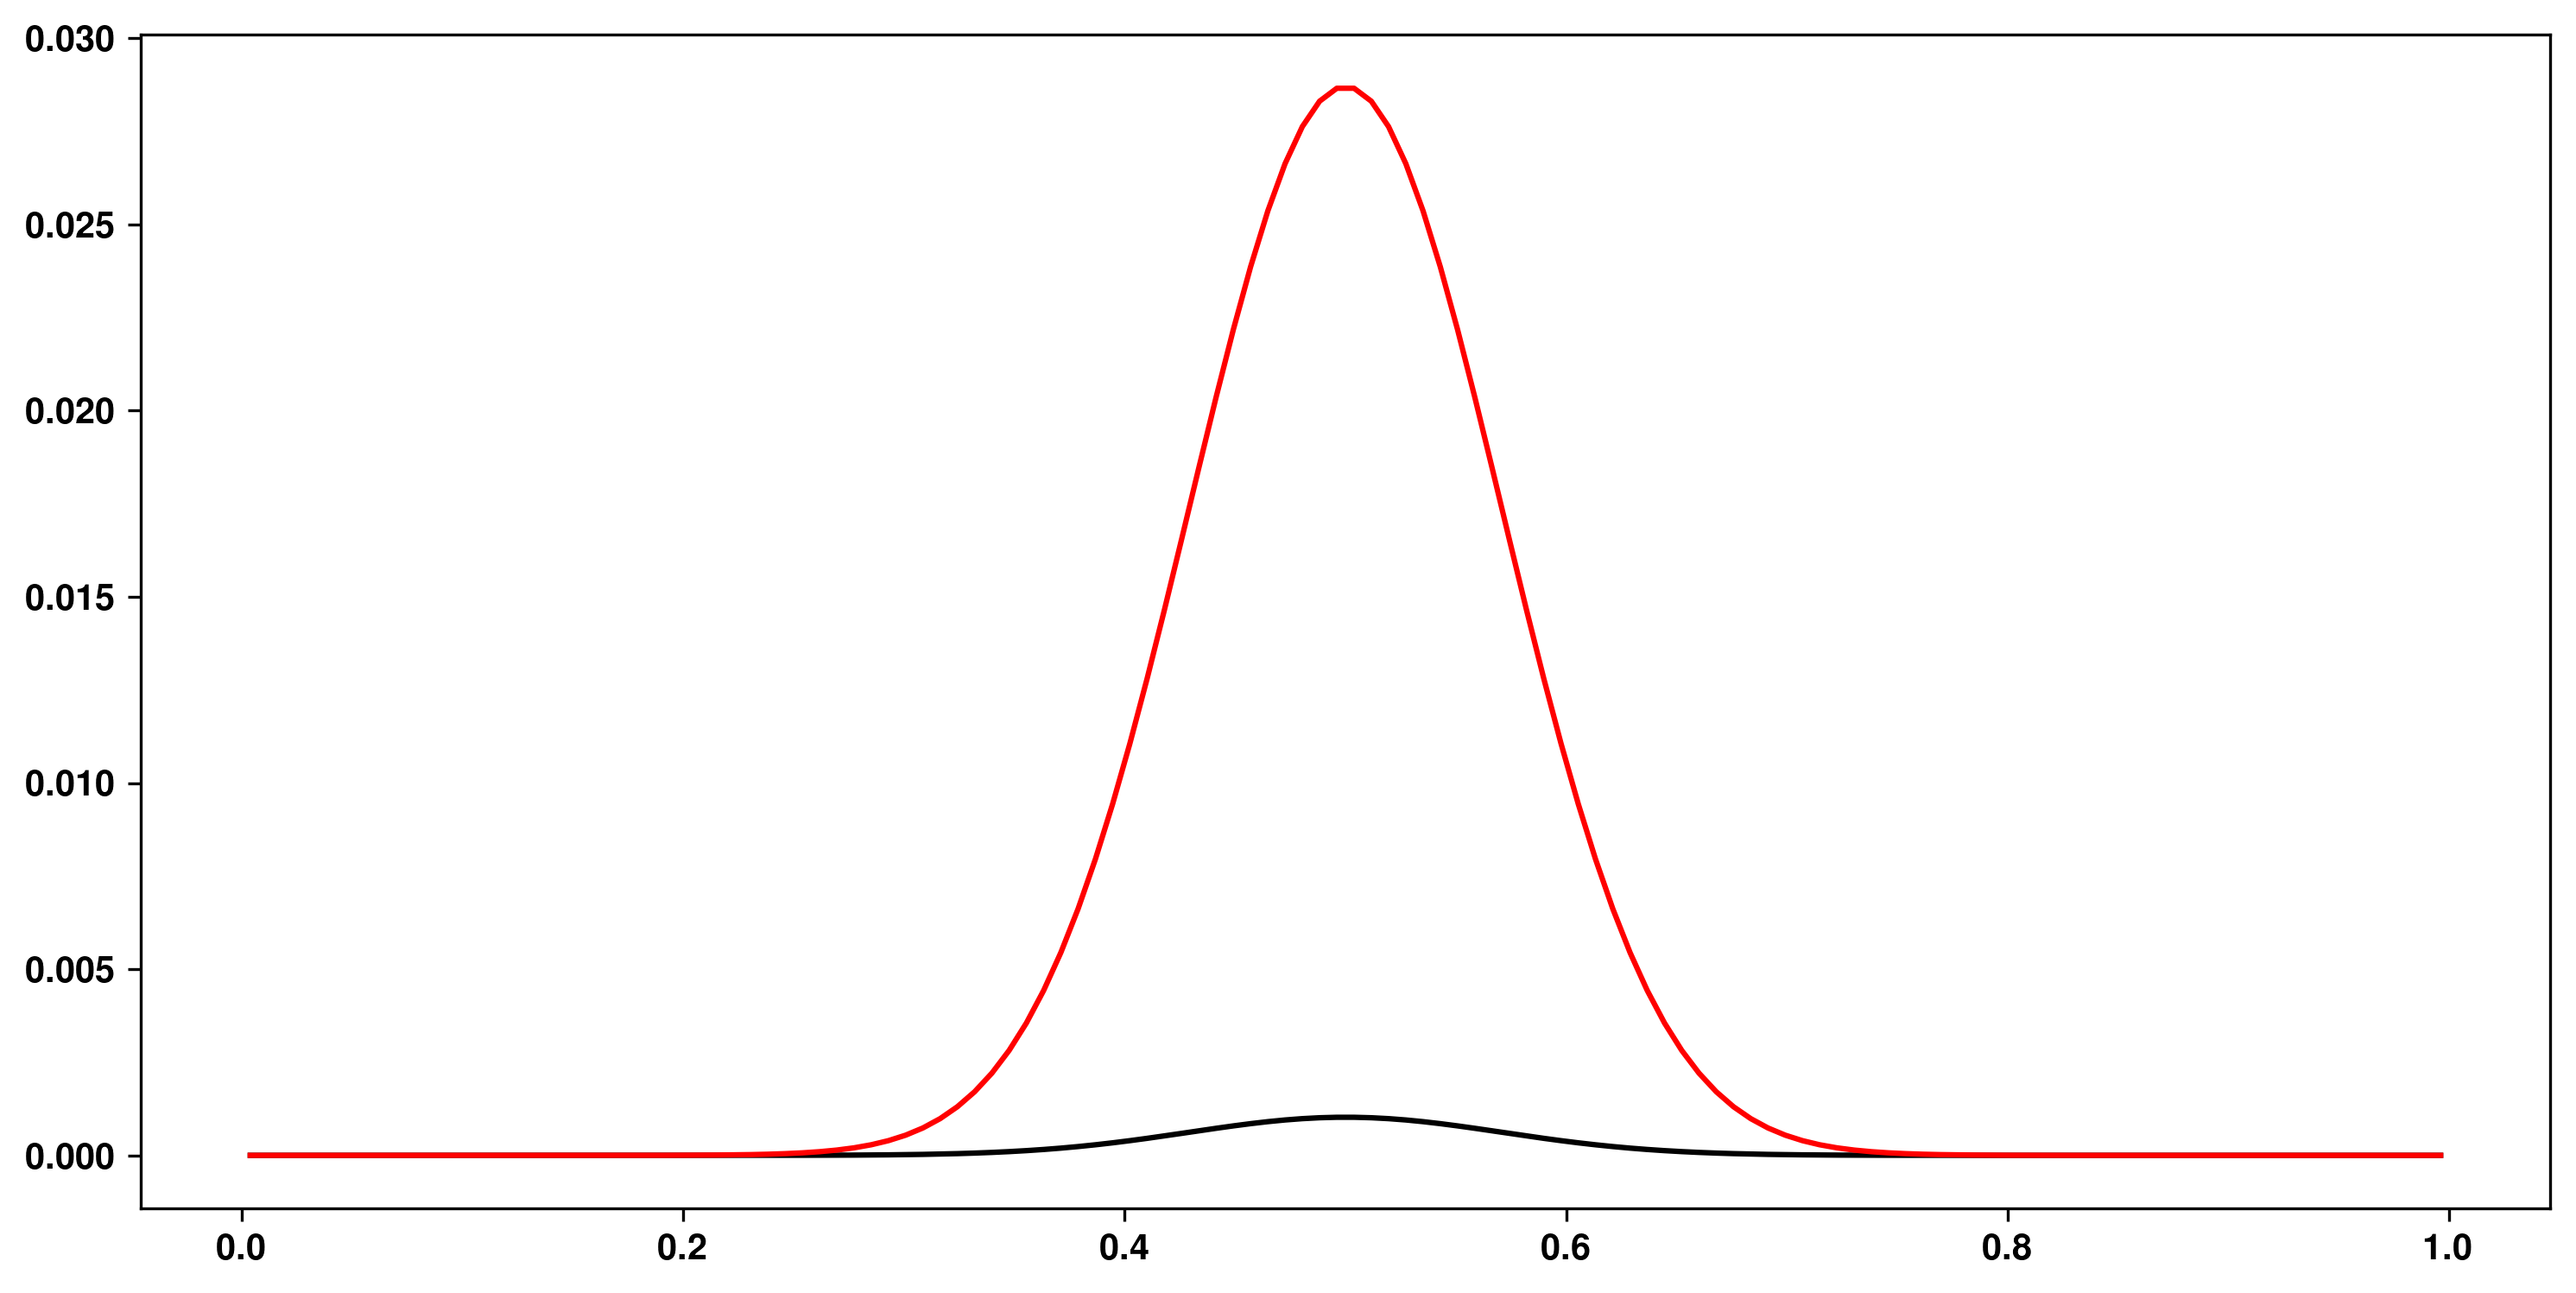

In [39]:
%matplotlib inline
plots, axes = plt.subplots(figsize=(12,6),dpi=300)
axes.plot(x1v,sigma_fr[9,:],color='black')
axes.plot(x1v,correct_sigma[9,:],color='red')

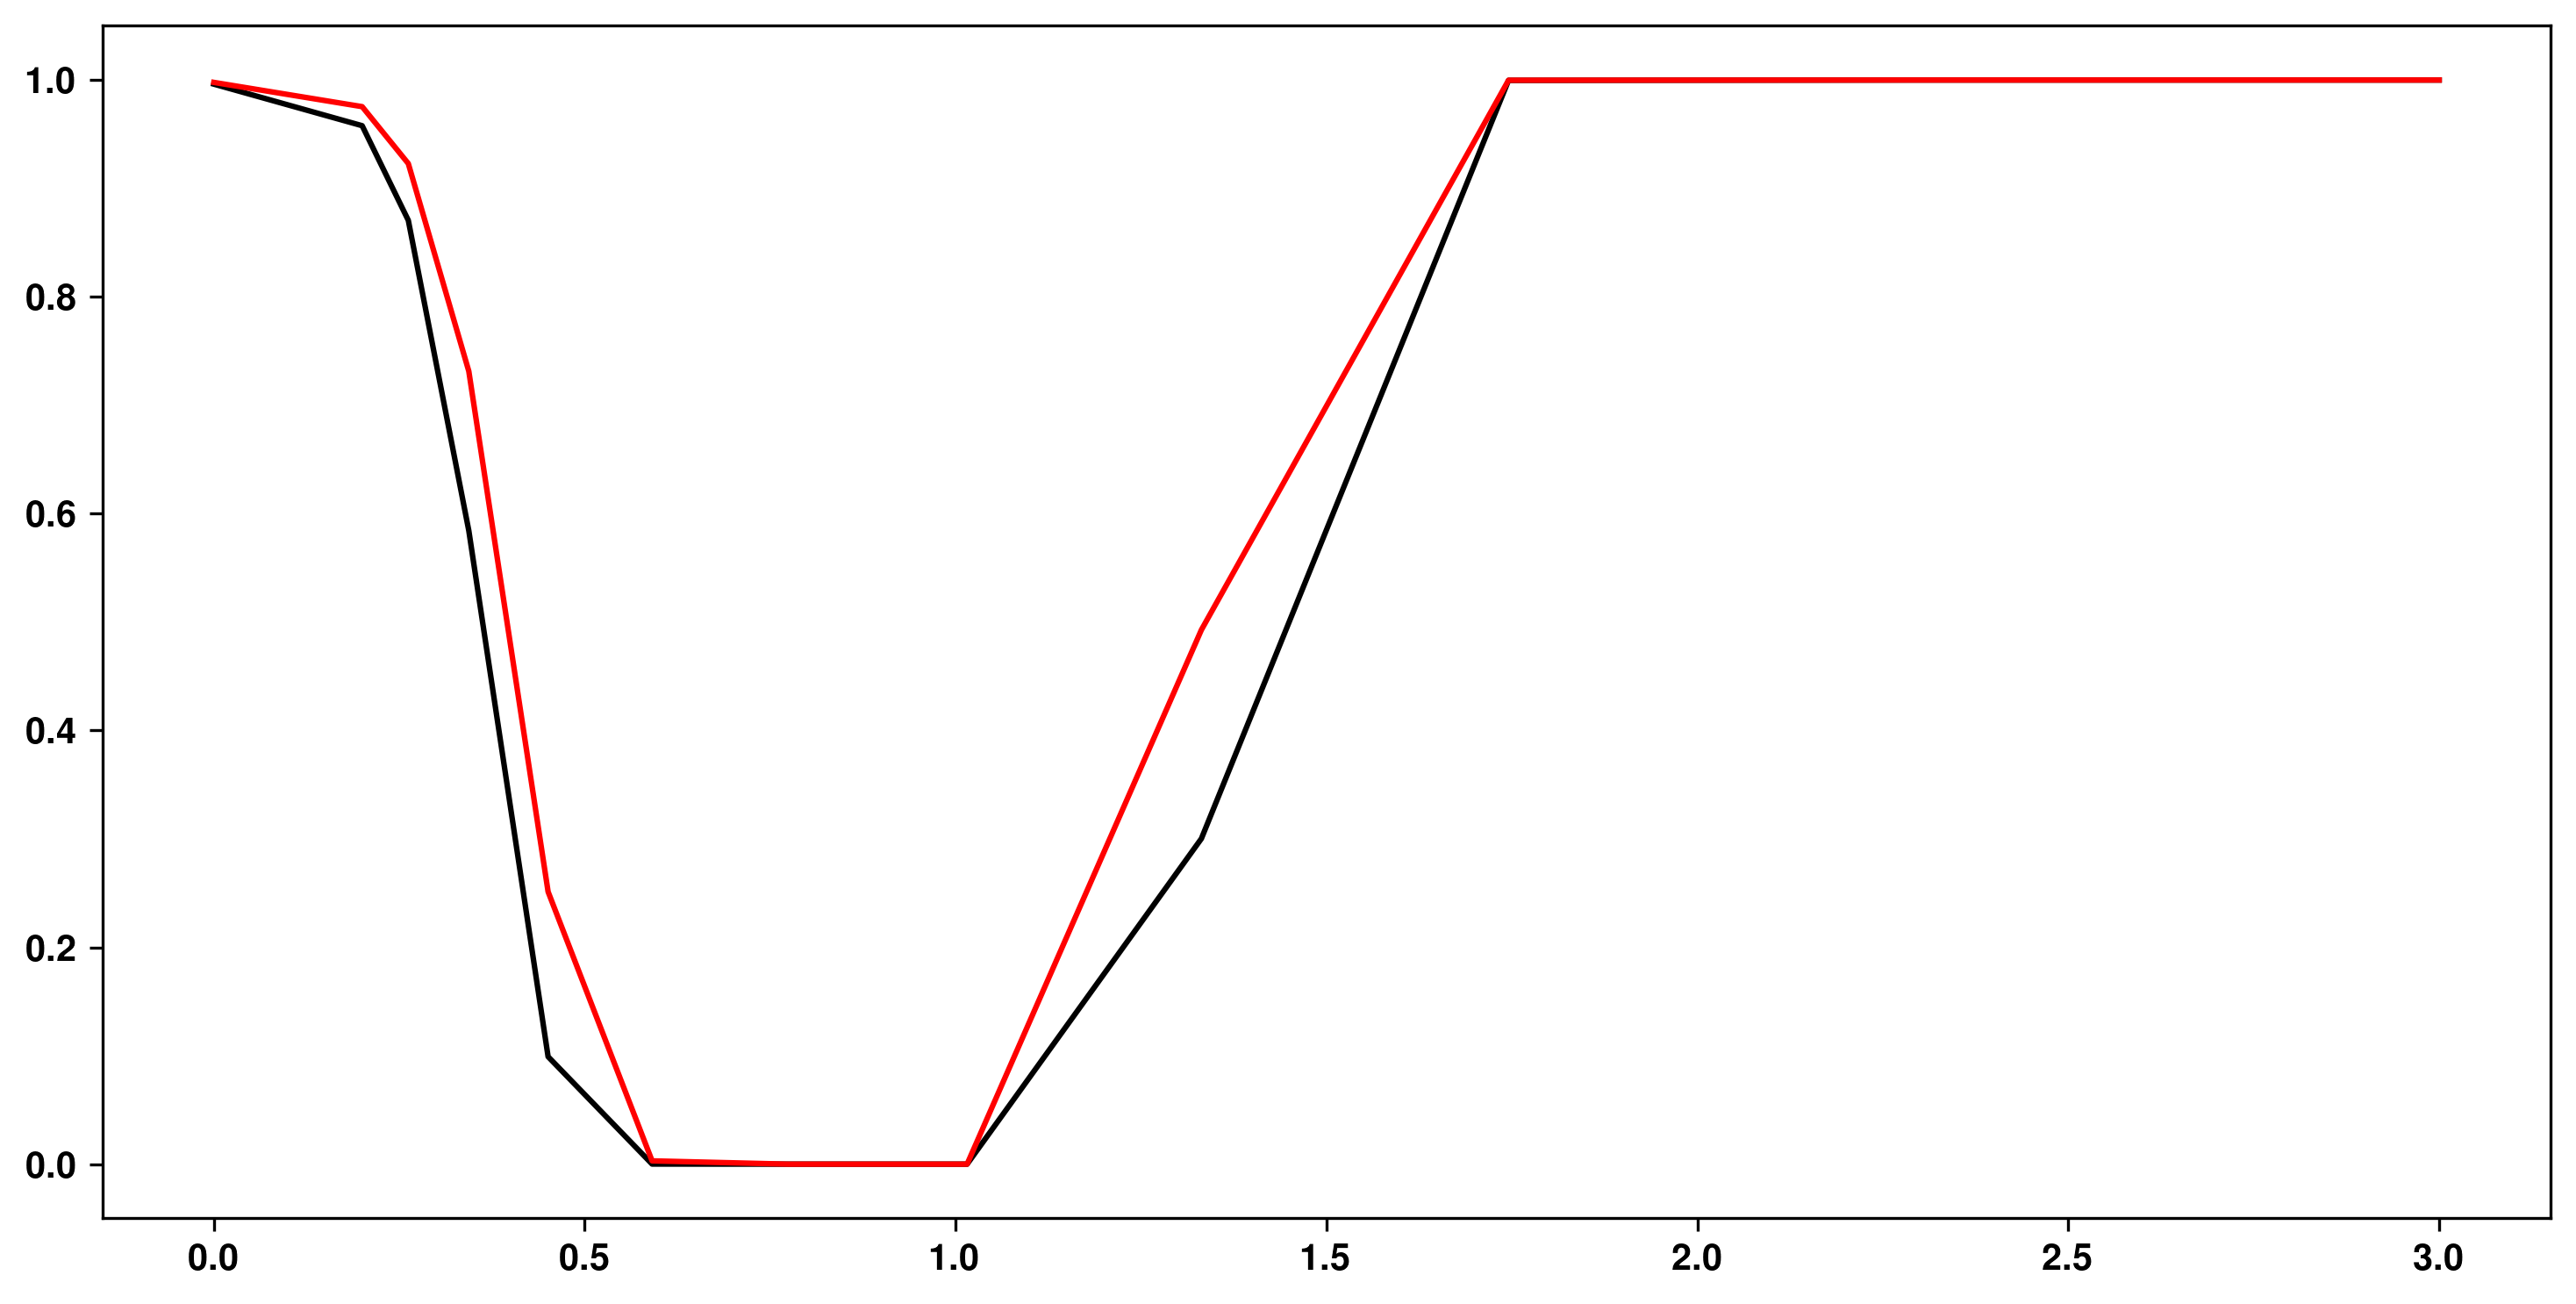

In [21]:
er_estimate_fr=exp(-tau_fr)
%matplotlib inline
plots, axes = plt.subplots(figsize=(12,6),dpi=300)
axes.plot(nu_grid,er_fr_o,color='black')
axes.plot(nu_grid,er_estimate_fr,color='red')

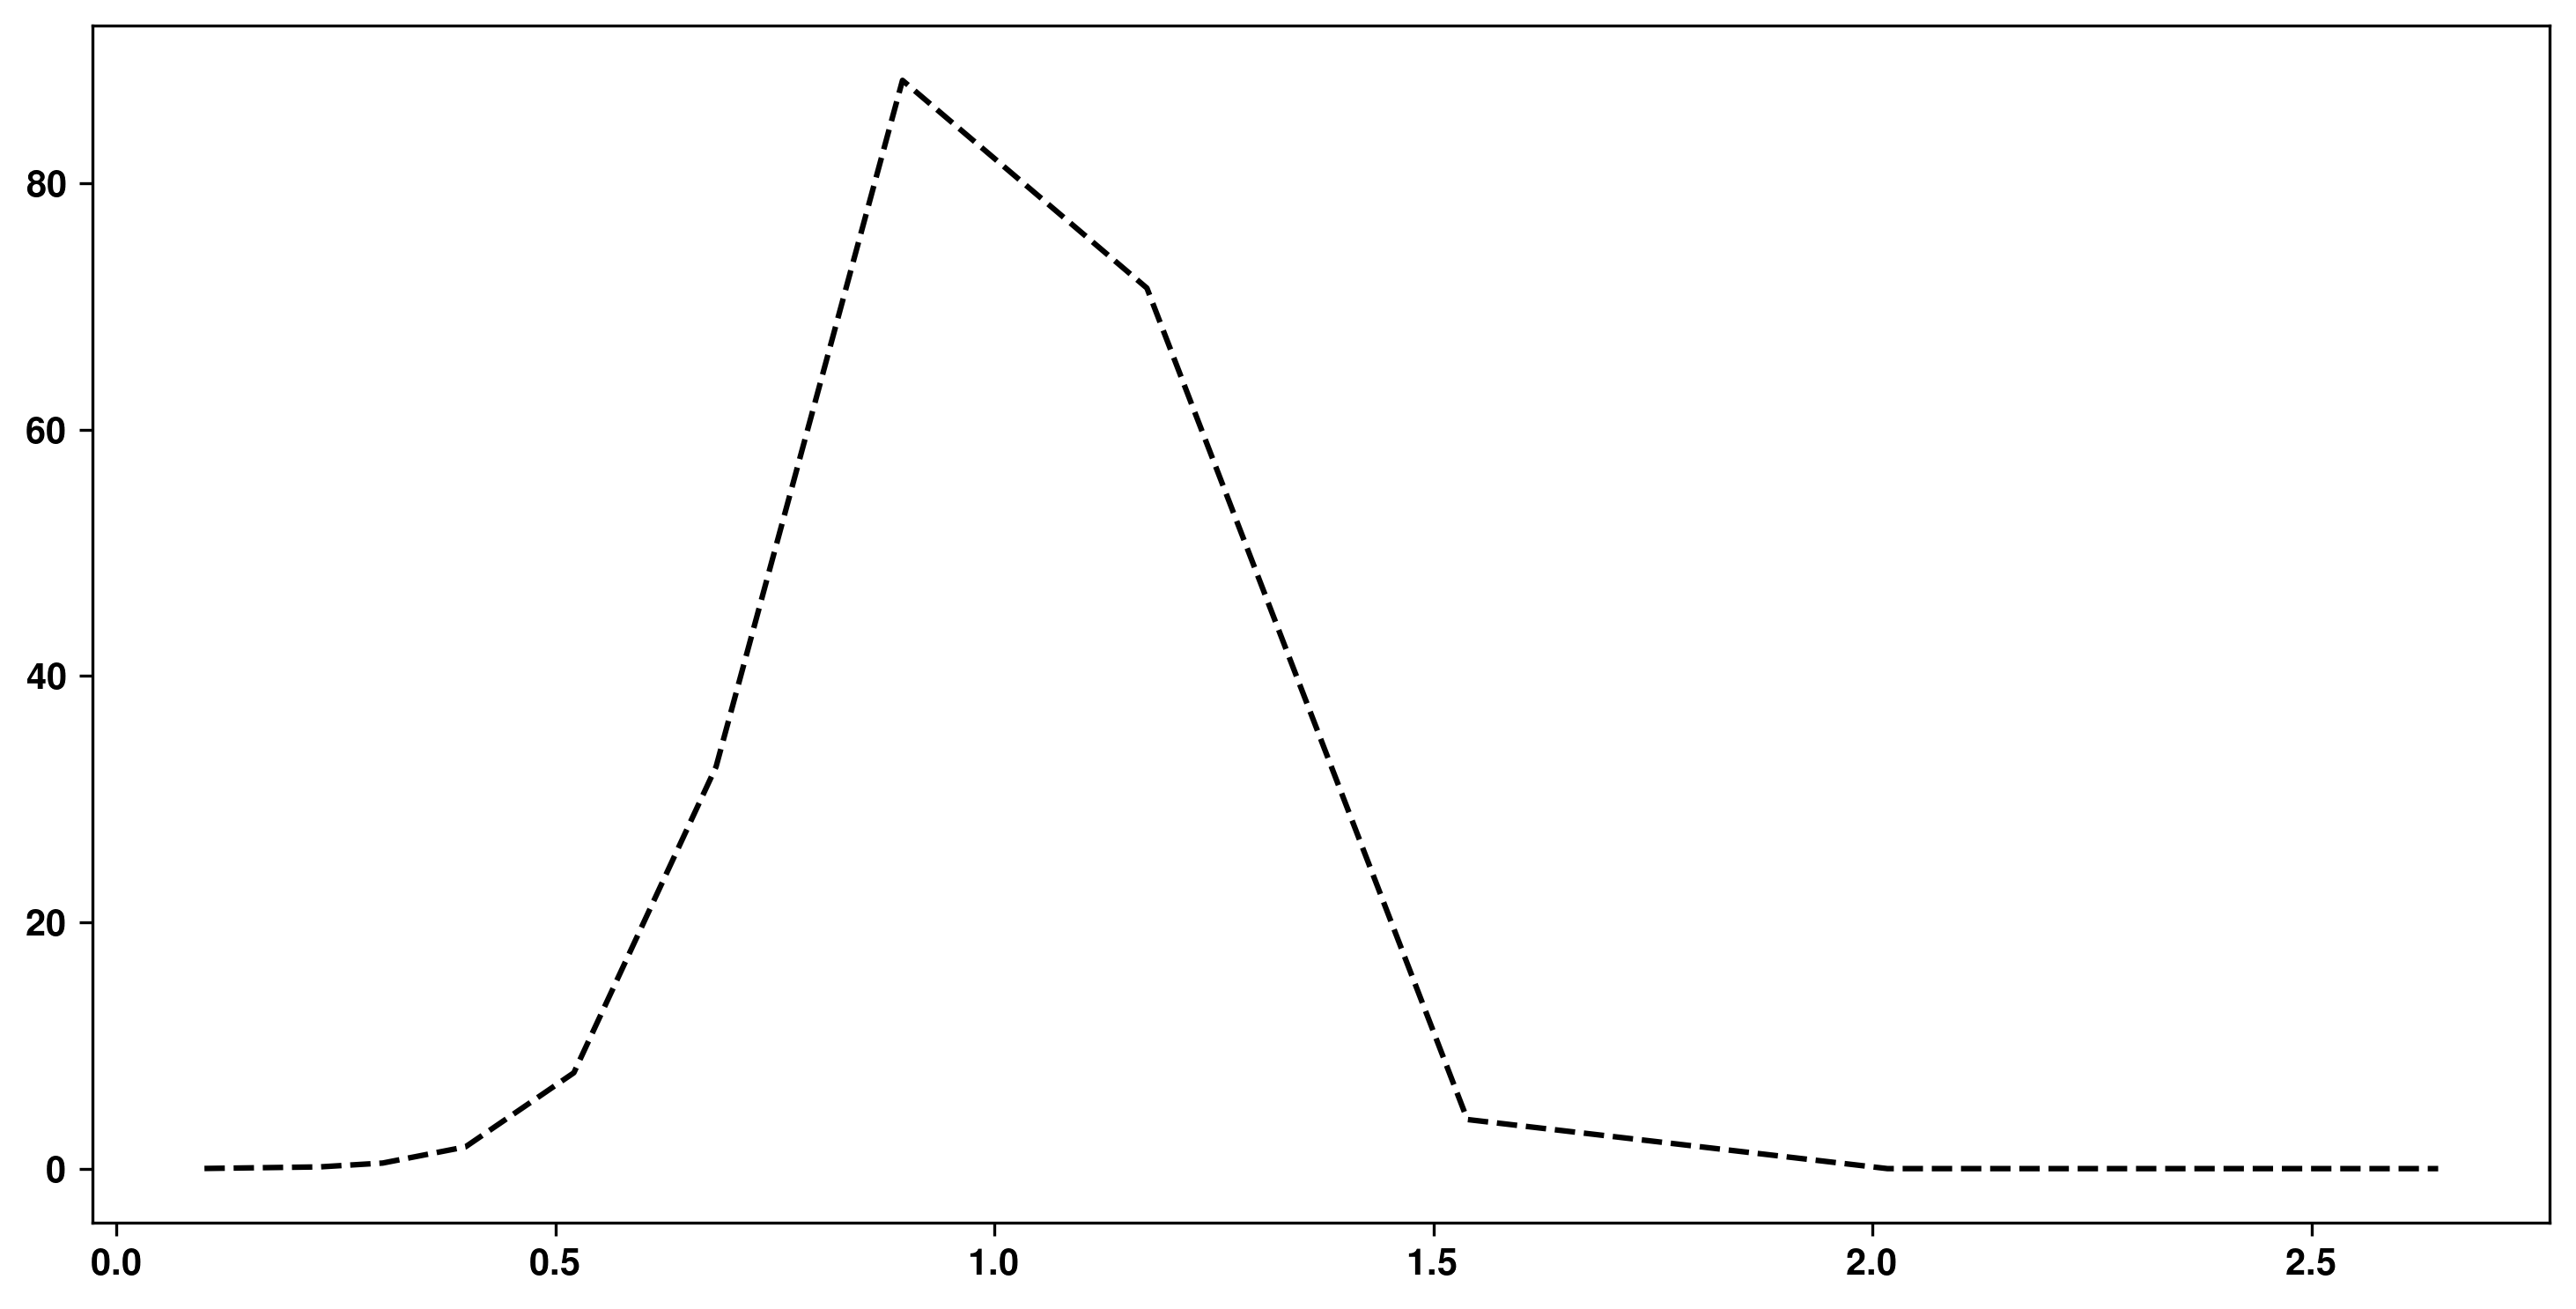

In [22]:
%matplotlib inline
plots, axes = plt.subplots(figsize=(12,6),dpi=300)
axes.plot(nu_center,sigma_fr[:-1,cen_index],color='black',linestyle='dashed')

In [23]:
plt.show()

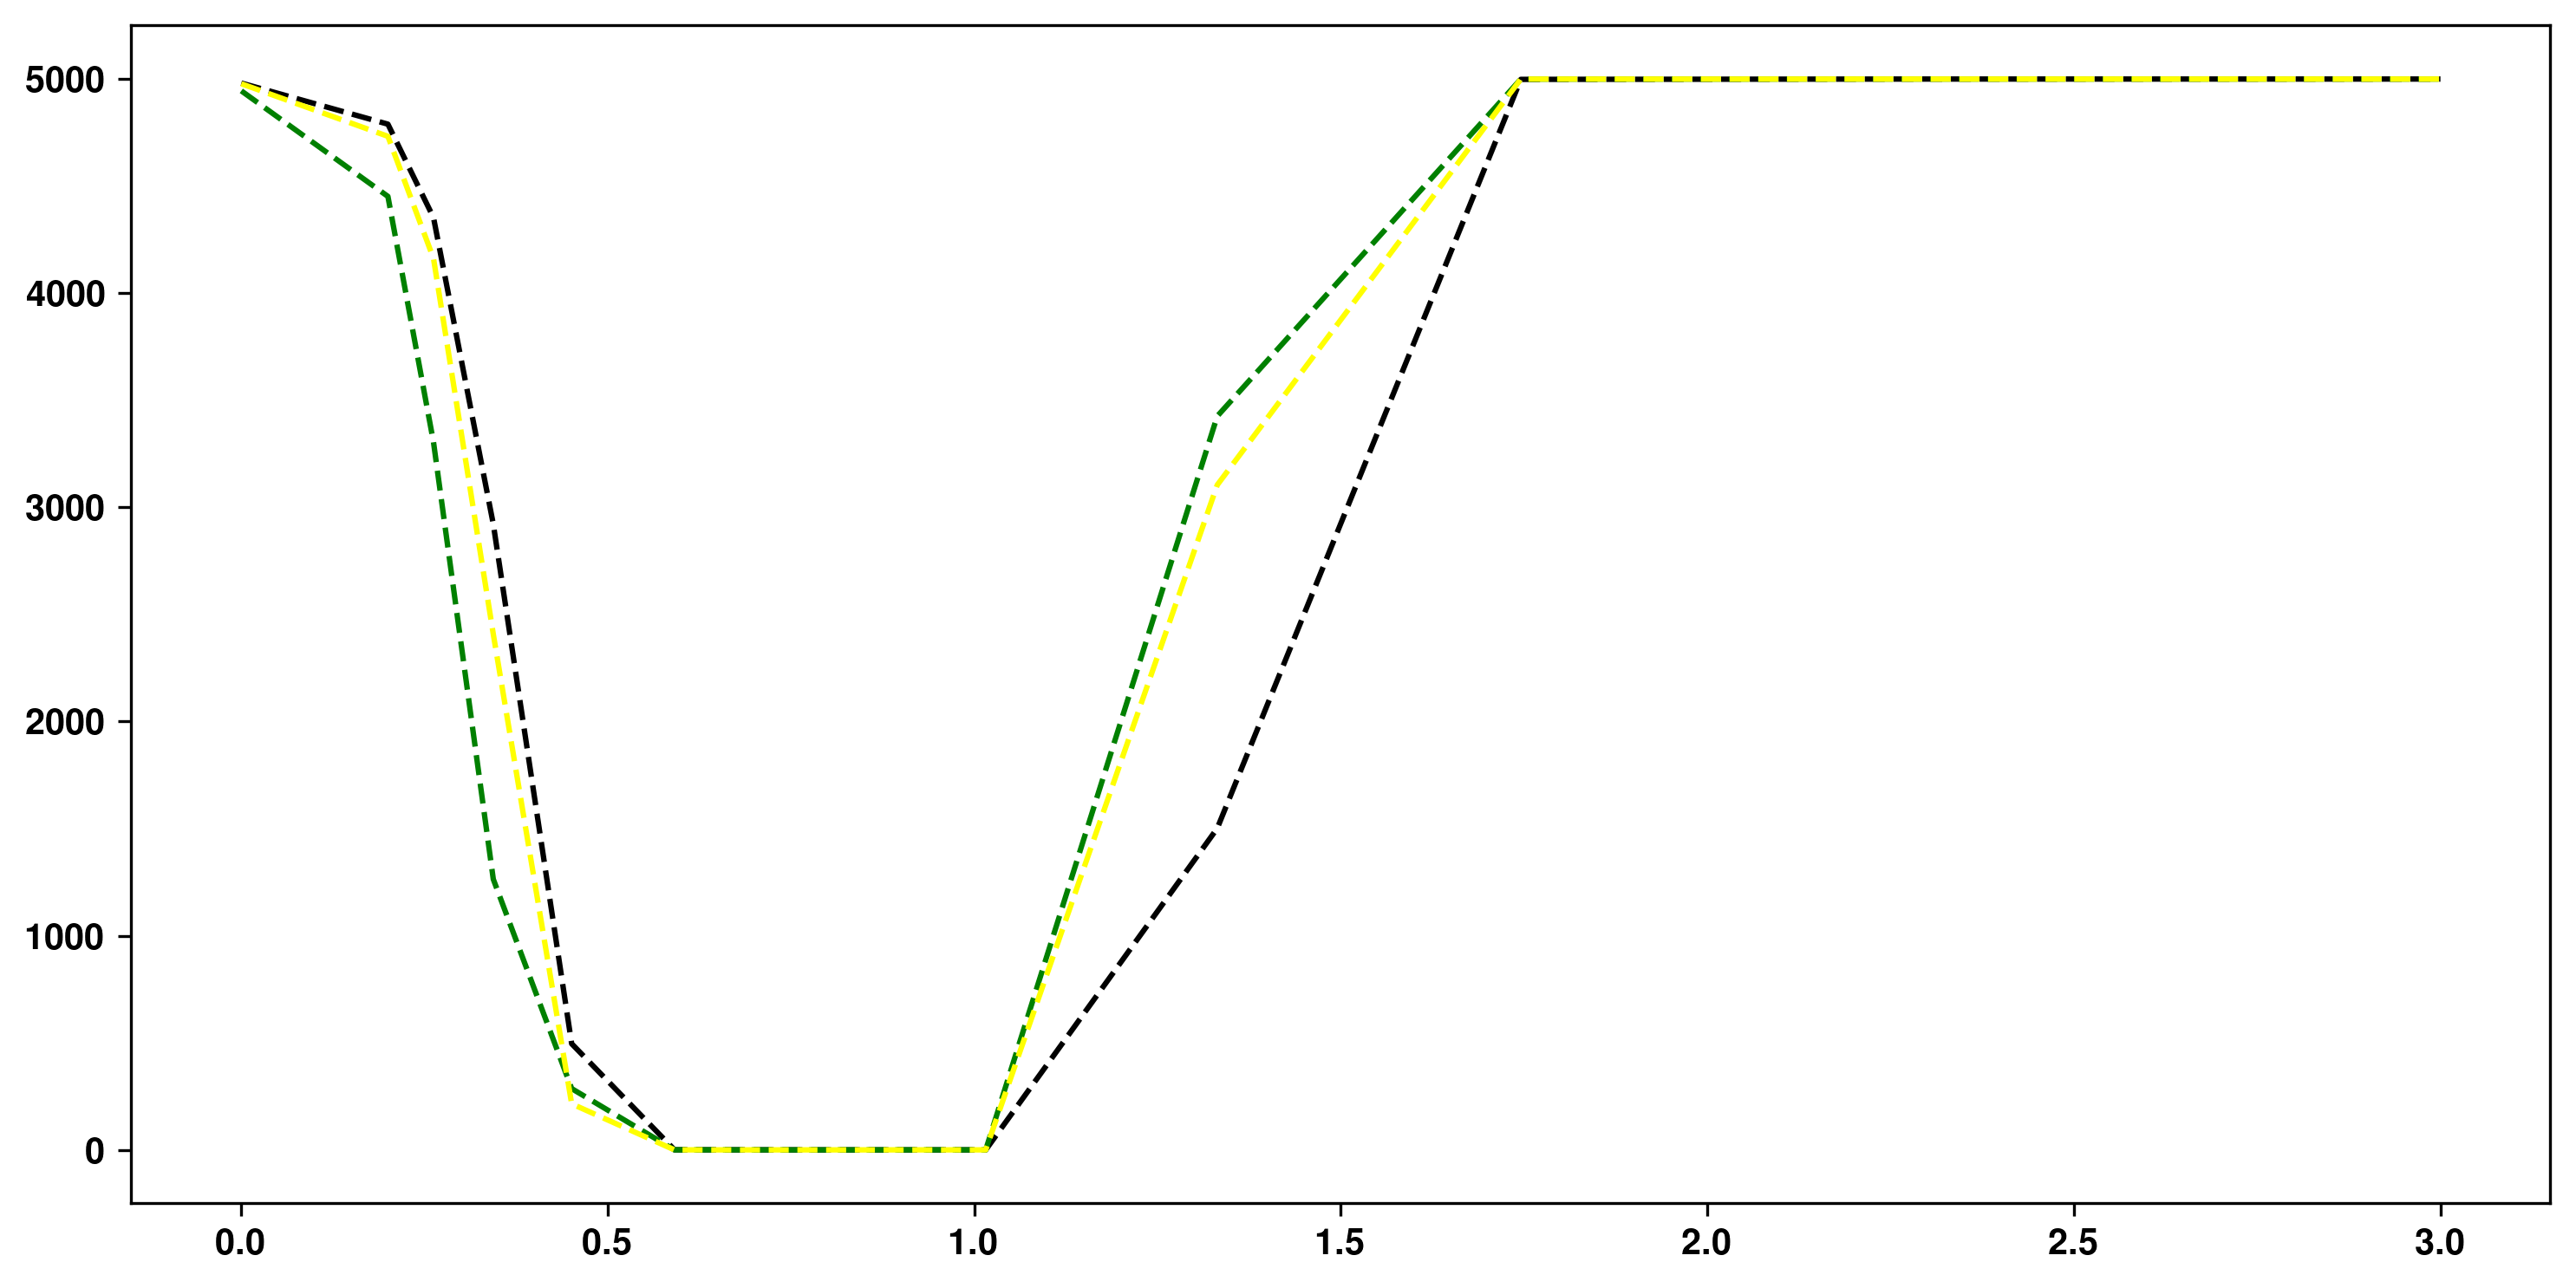

In [24]:
%matplotlib inline
plots, axes = plt.subplots(figsize=(12,6),dpi=300)
axes.plot(nu_grid,er_fr[:,nx1-1],color='black',linestyle='dashed')
#axes.plot(nu_grid,er_nur_fr[:,nx1-1],color='red',linestyle='dashed')
#axes.plot(nu_grid,er_v5_fr[:,nx1-1],color='blue',linestyle='dashed')
axes.plot(nu_grid,er_v_5_fr[:,nx1-1],color='green',linestyle='dashed')
axes.plot(nu_grid,er_nul_fr[:,nx1-1],color='yellow',linestyle='dashed')

In [27]:
ylabel='$E_r(\\nu)/E_{r,0}$'
filename='moving_absorption.pdf'
xlabel="$\\tilde{\\nu}$"
label2='$v=0.05c$'
label3='$v=-0.05c$'
#print(histories[:,0])

PlotProfile(nu_grid,er_fr_o,-0.1, 3.2, -0.05, 1.03, ylabel, '$v=0$',filename, xlabel,datax2=nu_grid,datay2=er_v5_fr_o,
            datay2_2=er_nur_fr_o,label2=label2,datax3=nu_grid,datay3=er_v_5_fr_o,label3=label3,logscale=0,
            xlogscale=0, 
            leg_loc=(0.6,0.3))

In [22]:
data=[nu_grid,er_fr_o,er_v5_fr_o,er_v_5_fr_o]
sol=[nu_grid,er_nur_fr_o,er_nul_fr_o]
ylabel1='$E_r(\\nu)/E_{r,0}$'
ylabel2='$E_r(\\nu)/E_{r,0}$'
xlabel="$\\tilde{\\nu}$"
filename='moving_absorption.pdf'
PlotProfile2(data,sol,filename,ylabel1,ylabel2,xlabel=xlabel,label1='$v=0$',label2='$v=0.05c$')

<Figure size 2700x3300 with 0 Axes>

In [28]:
data=[nu_grid,er_fr_o,er_v5_fr_o,er_v_5_fr_o]
sol=[nu_grid,er_nur_fr_o,er_nul_fr_o]
ylabel1='$E_{r,f}/E_{r,0}$'
ylabel2='$E_{r,f}/E_{r,0}$'
xlabel="$\\tilde{\\nu}$"
filename='moving_absorption_hist.pdf'
PlotProfile4(data,sol,filename,ylabel1,ylabel2,xlabel=xlabel,label1='$v=0$',label2='$v=0.05c$',label3='$v=-0.05c$')

<Figure size 2700x3300 with 0 Axes>

In [36]:
data=[x1v,sigma_fr[6,:]]
data1=[nu_grid,sigma_fr[:,cen_index]]
filename='moving_absorption_opacity.pdf'
ylabel1='$\\kappa_a$'
ylabel2='$\\kappa_a$'
PlotProfile3(data,data1,filename,ylabel1,ylabel2,xlabel='$\\tilde{\\nu}$')

<Figure size 2700x3300 with 0 Axes>

In [29]:
binleft=data1[0][:-1]
binright=data1[0][1:]
binheight=data1[1][:-1]
hist_x = np.array([binleft, binright]).T.flatten()
hist_y = np.array([binheight, binheight]).T.flatten()

In [30]:
print(binleft,binright)

[0.        0.2       0.2622039 0.3437544 0.4506687 0.5908354 0.7745967
 1.015511  1.331355  1.745432  2.288296 ] [0.2       0.2622039 0.3437544 0.4506687 0.5908354 0.7745967 1.015511
 1.331355  1.745432  2.288296  3.       ]


In [33]:
print(np.array([binleft,binright]).T.flatten())

[0.        0.2       0.2       0.2622039 0.2622039 0.3437544 0.3437544
 0.4506687 0.4506687 0.5908354 0.5908354 0.7745967 0.7745967 1.015511
 1.015511  1.331355  1.331355  1.745432  1.745432  2.288296  2.288296
 3.       ]


In [35]:
print(np.array([binheight,binheight]).T)

[[1.23221641e-02 1.23221641e-02]
 [1.40115038e-01 1.40115038e-01]
 [4.51781482e-01 4.51781482e-01]
 [1.76187456e+00 1.76187456e+00]
 [7.78080416e+00 7.78080416e+00]
 [3.26256409e+01 3.26256409e+01]
 [8.83468170e+01 8.83468170e+01]
 [7.14810638e+01 7.14810638e+01]
 [3.98641324e+00 3.98641324e+00]
 [1.02262630e-03 1.02262630e-03]
 [9.01477764e-12 9.01477764e-12]]


In [39]:
cen_index

63

In [98]:
del_x=x1f[1:]-x1f[:-1]
print(del_x)
np.sum(del_x*sigma_fr[6,:])
print(np.sum(del_x*sigma_fr[4,:]))
print(np.sum(del_x*sigma_fr[8,:]))

[0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125 0.0078125
 0.007

In [100]:
print(nu_grid[3],nu_grid[8])

0.3437544 1.331355


In [87]:
print(sigma_fr)

[[2.52913033e-13 5.45710504e-13 1.16319356e-12 ... 1.16319356e-12
  5.45710504e-13 2.52913033e-13]
 [2.87586816e-12 6.20526157e-12 1.32266472e-11 ... 1.32266472e-11
  6.20526157e-12 2.87586816e-12]
 [9.27283771e-12 2.00080057e-11 4.26474862e-11 ... 4.26474862e-11
  2.00080057e-11 9.27283771e-12]
 ...
 [2.09894578e-14 4.52889577e-14 9.65343799e-14 ... 9.65343799e-14
  4.52889577e-14 2.09894578e-14]
 [1.85028777e-22 3.99236648e-22 8.50981341e-22 ... 8.50981341e-22
  3.99236648e-22 1.85028777e-22]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [81]:
print(sigma_fr)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
print(nu_grid[9])
print(nu_grid[10])

1.745432
2.288296


0.00018153258559248638

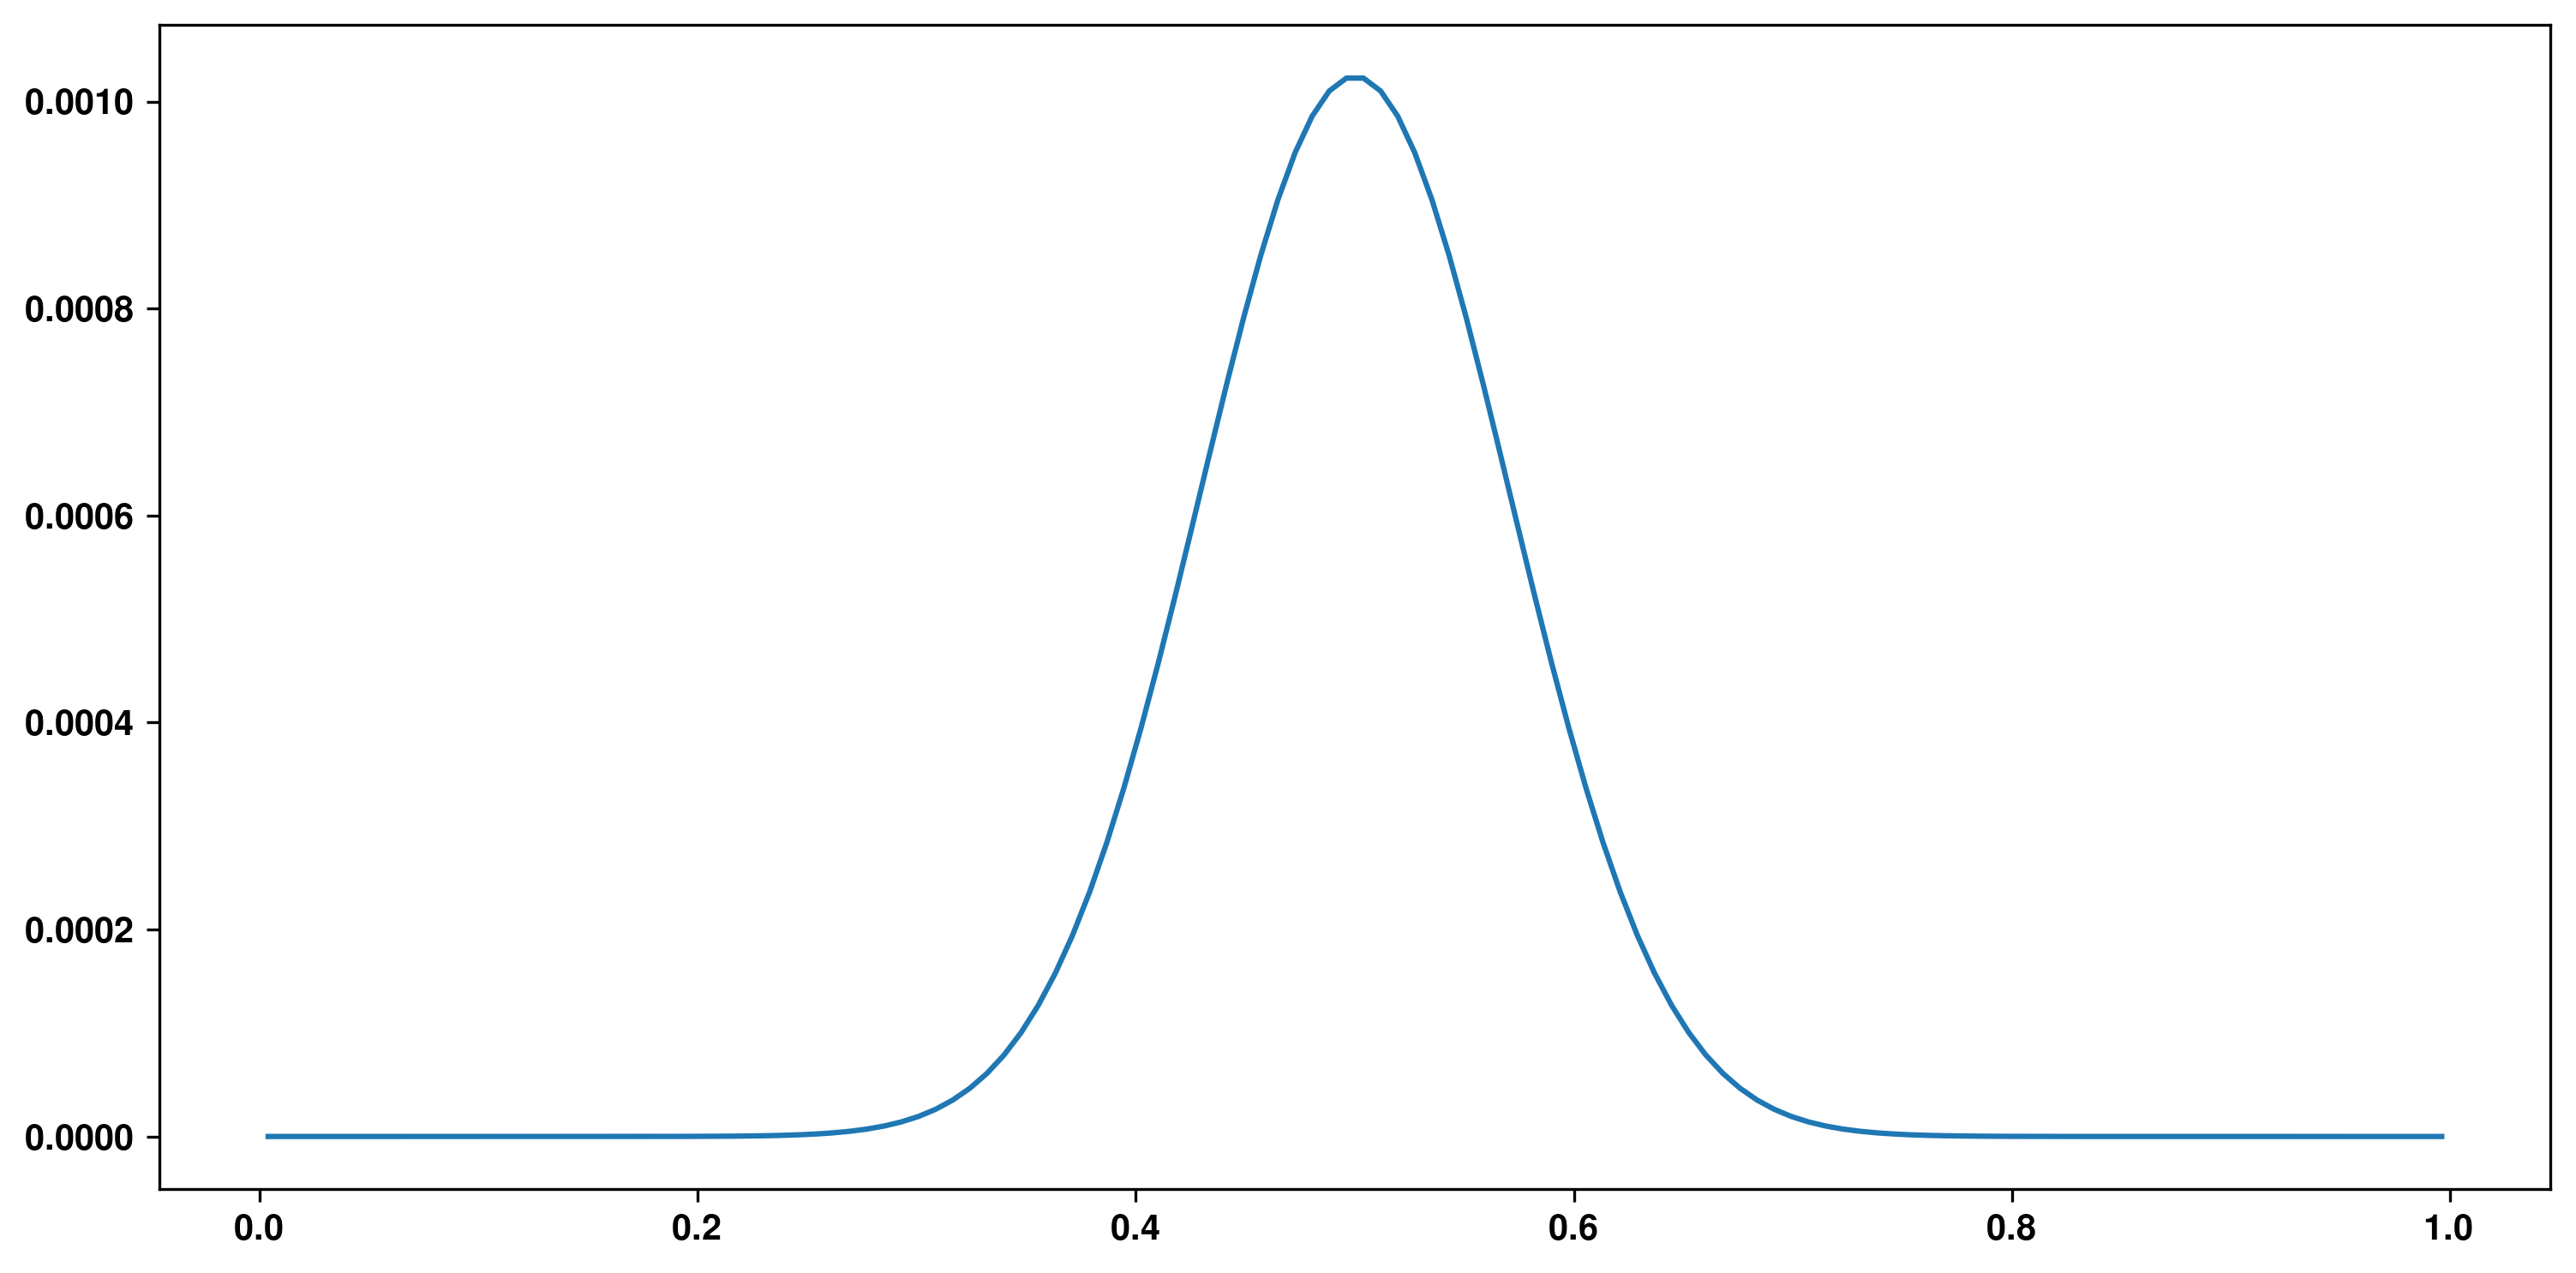

In [52]:
%matplotlib inline
plots, axes = plt.subplots(figsize=(12,6),dpi=300)
#axes.plot(x1v,er_v5_fr[9,:],color='black')
#axes.plot(x1v,fr_v5_fr[9,:],color='red')
axes.plot(x1v,sigma_fr[9,:])
tau_fr[9]

In [30]:
print(fr_v5_fr[9,:])

[2.09894578e-14 4.52889577e-14 9.65343799e-14 2.03268568e-13
 4.22821446e-13 8.68845089e-13 1.76370615e-12 3.53678501e-12
 7.00631480e-12 1.37110020e-11 2.65061896e-11 5.06202129e-11
 9.54990739e-11 1.77980714e-10 3.27676469e-10 5.95958616e-10
 1.07074372e-09 1.90043714e-09 3.33211547e-09 5.77145265e-09
 9.87526505e-09 1.66920984e-08 2.78722290e-08 4.59759804e-08
 7.49184608e-08 1.20599438e-07 1.91778639e-07 3.01268500e-07
 4.67526036e-07 7.16731392e-07 1.08543941e-06 1.62387778e-06
 2.39993574e-06 3.50384153e-06 5.05344815e-06 7.19995478e-06
 1.01337519e-05 1.40899456e-05 1.93529395e-05 2.62592966e-05
 3.51979834e-05 4.66069905e-05 6.09653216e-05 7.87795070e-05
 1.00563913e-04 1.26814717e-04 1.57977673e-04 1.94410750e-04
 2.36343374e-04 2.83834466e-04 3.36732744e-04 3.94642790e-04
 4.56900394e-04 5.22561546e-04 5.90407522e-04 6.58968871e-04
 7.26568338e-04 7.91382801e-04 8.51520861e-04 9.05112422e-04
 9.50404094e-04 9.85854072e-04 1.01021898e-03 1.02262630e-03
 1.02262630e-03 1.010218